In [2]:
# !pip -q install python-crfsuite
# !pip -q install category_encoders
# !pip -q install flair
# import nltk
# nltk.download('averaged_perceptron_tagger')
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('words')
# !pip -q install plotly 
# !pip -q install seaborn
# !pip -q install chart_studio
# # !pip3 install torch==1.3.1+cpu torchvision==0.4.2+cpu -f https://download.pytorch.org/whl/torch_stable.html

You should consider upgrading via the 'pip install --upgrade pip' command.


In [13]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
import plotly.graph_objs as go
import plotly.plotly as py
# import cufflinks
pd.options.display.max_columns = 30
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
# cufflinks.go_offline()
# cufflinks.set_config_file(world_readable=True, theme='pearl')

In [66]:
import pycrfsuite
import nltk, re, math
from nltk import tag
import pandas as pd
import numpy as np
import collections, itertools
from flair.data import Sentence
from flair.models import SequenceTagger
flatten = itertools.chain.from_iterable
TAGGER = SequenceTagger.load('pos')
POS_DICTIONARY = {}
from nltk.corpus import stopwords
tagger = pycrfsuite.Tagger()
tagger.open('model/model.crf.tagger')
stopwords = stopwords.words('english')
import re

2019-12-13 05:52:35,208 loading file /home/nehas/.flair/models/en-pos-ontonotes-v0.4.pt


In [70]:
df = pd.read_csv("train_test/test.csv",names=['text','character','gender'])

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1124 entries, 0 to 1123
Data columns (total 3 columns):
text         1120 non-null object
character    1124 non-null object
gender       1124 non-null object
dtypes: object(3)
memory usage: 26.4+ KB


In [72]:
df.describe()

,text,character,gender
count,1120,1124,1124
unique,1097,18,2
top,What?,TANYA,male
freq,10,124,598


In [19]:
df['text_len'] = df.apply(lambda x: len(str(x.text).split()),axis = 1)

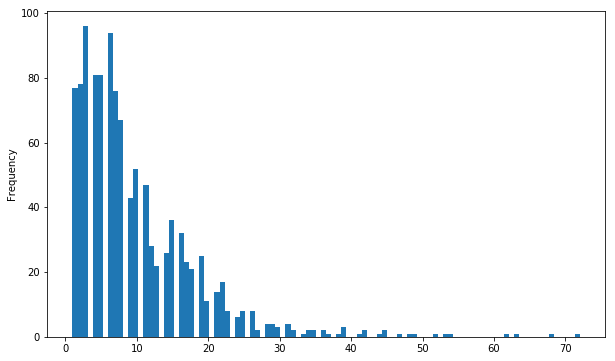

In [22]:
df['text_len'].plot(
    kind='hist',
    bins=100)

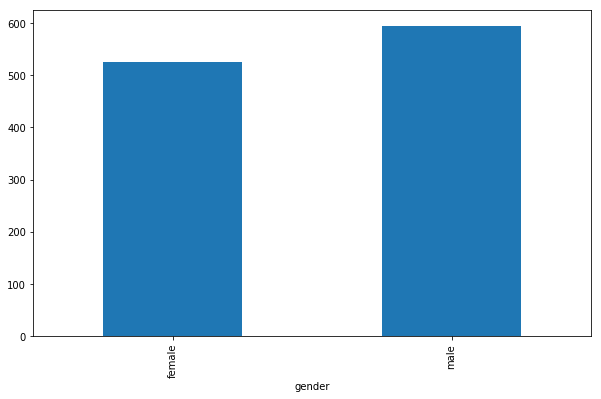

In [27]:
df.groupby('gender')['text'].count().plot(kind='bar')

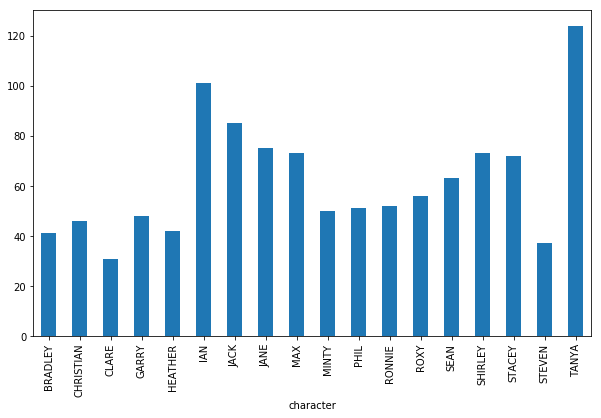

In [28]:
df.groupby('character')['text'].count().plot(kind='bar')

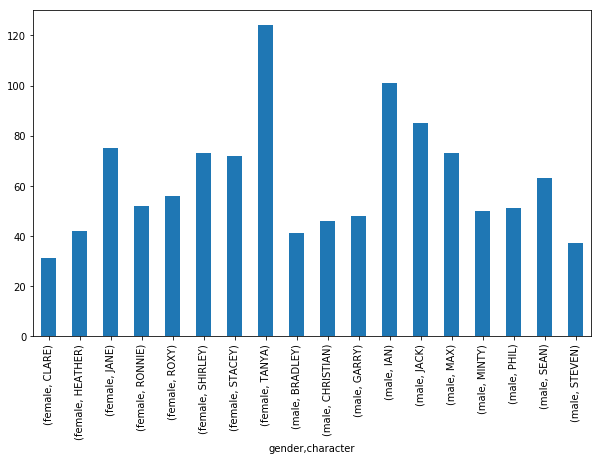

In [35]:
df.groupby(['gender','character'])['text'].count().plot(kind='bar')

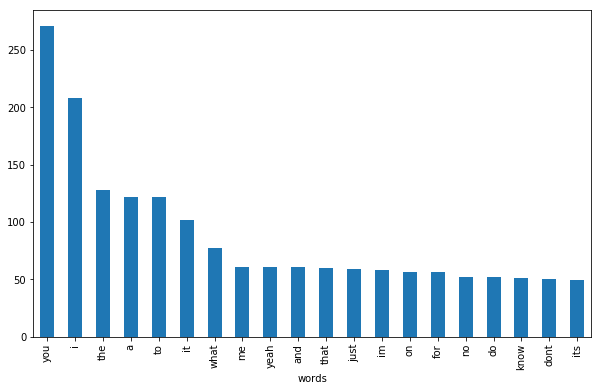

In [59]:
total_words = list(itertools.chain(*[nltk.wordpunct_tokenize(re.sub(r'[^\w\s]','',str(i).lower())) for i in df[df['gender']=='male'].text.values.tolist()]))

count_vector = collections.Counter(total_words)
df1 = pd.DataFrame(count_vector.most_common(20),columns=['words','frequency'])
df1.groupby('words').sum()['frequency'].sort_values(ascending=False).plot(kind='bar')

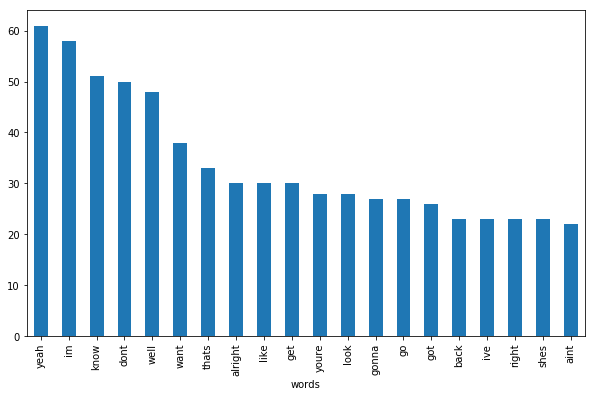

In [67]:
total_words = list(itertools.chain(*[nltk.wordpunct_tokenize(re.sub(r'[^\w\s]','',str(i).lower())) for i in df[df['gender']=='male'].text.values.tolist()]))
total_words = [w for w in total_words if w not in stopwords ]

count_vector = collections.Counter(total_words)
df1 = pd.DataFrame(count_vector.most_common(20),columns=['words','frequency'])
df1.groupby('words').sum()['frequency'].sort_values(ascending=False).plot(kind='bar')